In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
#only get data analyst jobs in India
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

#drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IN = df_DA_IN.dropna(subset= ['salary_year_avg']) 

df_DA_IN = df_DA_IN.explode('job_skills')



In [3]:
df_DA_IN_group = df_DA_IN.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_top_pay = df_DA_IN_group.sort_values(by= 'median', ascending= False).head(10)

df_DA_skills = df_DA_IN_group.sort_values(by='count', ascending=False).head(
    10).sort_values(by='median', ascending=False)

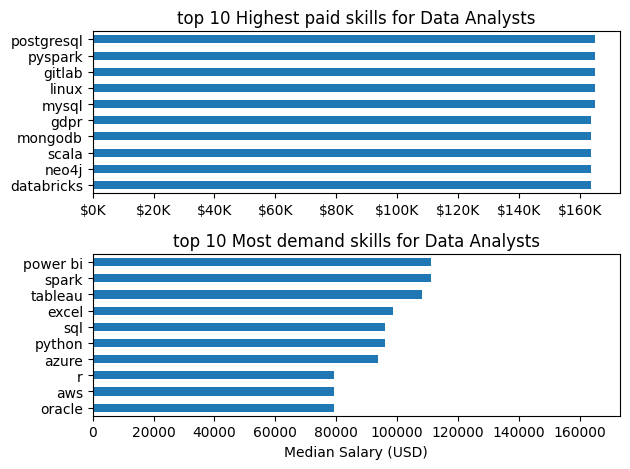

In [4]:
fig,ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind= 'barh', y= 'median', ax=ax[0], legend= False)
#alternatively :- ax[0].invert_yaxis()
ax[0].set_title('top 10 Highest paid skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

df_DA_skills.plot(kind= 'barh', y='median', ax=ax[1], legend= False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('top 10 Most demand skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

fig.tight_layout()

